### Import Libraries

In [1]:
import numpy as np
import pandas as pd

#import for visualization
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

### Loading Dataset

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
print("datapoints =",train_data.shape[0])
print("features =",train_data.shape[1]-1) #(-1 to exclude the last column[target])

datapoints = 7352
features = 562


In [5]:
print("Missing values in datasets ? ",train_data.isnull().values.any())

Missing values in datasets ?  False


#### Target column [classes]

In [6]:
train_data["Activity"].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

#### Classes Distribution

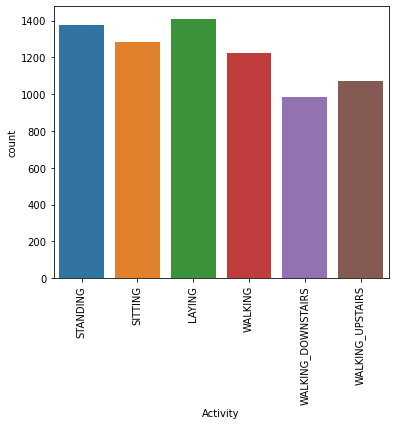

In [7]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x='Activity', data=train_data)
plt.xticks(x = train_data['Activity'],  rotation='vertical')
plt.show()

Ignore feature ( Subject ) because it is an identifier of the subject who carried out the experiment.
Ignore the target column (Activity)

In [8]:
X = pd.DataFrame(train_data.drop(['Activity','subject'],axis=1))

In [9]:
Y = train_data.Activity.values

In [10]:
print("X size is ,",X.shape, "Y size is , ", Y.shape)

X size is , (7352, 561) Y size is ,  (7352,)


Check the data type of the features

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [12]:
#Total Number of Continous  features in the training set
number_col = X._get_numeric_data().columns
print("Number of numeric features:",number_col.size)

Number of numeric features: 561


We will change the non-numeric target labels into numeric values

In [13]:
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()

In [14]:
encode.fit(Y)
y = encode.transform(Y)
y.shape

(7352,)

In [15]:
np.unique(Y)

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [16]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

Scaling the features

In [17]:
# Scaling the feature 
##----StandardScaler: 
## the standerScaler used to scale the features to the unit variance. 
## Scalling needed before training to prevent one featuers (has magnitude lager than others) to dominate the other.
from sklearn.preprocessing import StandardScaler
scaler_ = StandardScaler()
X = scaler_.fit_transform(X)

Splitting the data into training and validation sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2,random_state=99)
print("Training input size , ",X_train.shape,"Validation input size ,", X_valid.shape)
print("Training output size," ,y_train.shape,"Validation output size, ", y_valid.shape)

Training input size ,  (5881, 561) Validation input size , (1471, 561)
Training output size, (5881,) Validation output size,  (1471,)


#### Training the model by Kernal- SVM with deafult hyperparameters

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(15,), random_state=1,max_iter=30000)

In [21]:
mlp.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), max_iter=30000,
              random_state=1, solver='lbfgs')

In [22]:
y_pre=mlp.predict(X_valid)

In [23]:
# compute and print accuracy score
print('Model accuracy score with MLP : {0:0.4f}'. format(accuracy_score(y_valid, y_pre)))

Model accuracy score with MLP : 0.9816


#### Test the model (supposed to be the last part ) 

In [24]:
#load the testing dataset
test_data = pd.read_csv('test.csv')
print("Missing values in datasets ? ",test_data.isnull().values.any())

Missing values in datasets ?  False


In [25]:
#Ignore feature ( Subject ) because it is an identifier of the subject who carried out the experiment.
#Ignore the target column (Activity)

X_test = pd.DataFrame(test_data.drop(['Activity','subject'],axis=1))

Y_test = test_data.Activity.values

print("X size is ,",X_test.shape, "Y size is , ", Y_test.shape)

X size is , (2947, 561) Y size is ,  (2947,)


In [26]:
#change the non-numeric target labels into numeric values
encode.fit(Y_test)
y_test = encode.transform(Y_test)

# Scaling the feature 
##----StandardScaler: 
## the standerScaler used to scale the features to the unit variance. 
## Scalling needed before training to prevent one featuers (has magnitude lager than others) to dominate the other.
from sklearn.preprocessing import StandardScaler
scaler_ = StandardScaler()
X_testt = scaler_.fit_transform(X_test)

In [27]:
# make perdication on the validation set
y_pre = mlp.predict(X_testt)
# compute and print accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pre)))

Model accuracy score: 0.9430


#### Hyper paramenter Tuning 

What is GridSearchCV?
GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec#:~:text=What%20is%20GridSearchCV%3F,parameters%20from%20the%20listed%20hyperparameters.

1- estimator: estimator object you created

2-params_grid: the dictionary object that holds the hyperparameters you want to try

3- scoring: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric

4- cv: number of cross-validation you have to try for each selected set of hyperparameters

In [28]:
# Create the parameter grid based on the results of random search 
params_grid =   [ {'hidden_layer_sizes': [(50,10,), (15,), (9,)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.005, 0.05],
    'learning_rate': ['adaptive']}]

In [29]:
# Performing CV to tune parameters for best SVM fit 
mlp_model = GridSearchCV(MLPClassifier(max_iter=100000), params_grid, cv=5)
mlp_model.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100000),
             param_grid=[{'activation': ['tanh', 'relu'],
                          'alpha': [0.0001, 0.005, 0.05],
                          'hidden_layer_sizes': [(50, 10), (15,), (9,)],
                          'learning_rate': ['adaptive'],
                          'solver': ['lbfgs', 'adam']}])

In [30]:
# View the accuracy score
print('Best score for training data:', mlp_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best hidden_layer_sizes:',mlp_model.best_estimator_.hidden_layer_sizes,"\n") 
print('Best activation:',mlp_model.best_estimator_.activation,"\n")
print('Best optimizer:',mlp_model.best_estimator_.solver,"\n")
print('Best alpha:',mlp_model.best_estimator_.alpha,"\n")

final_model = mlp_model.best_estimator_
Y_pred = final_model.predict(X_valid)
Y_pred_label = list(encode.inverse_transform(Y_pred))

Best score for training data: 0.9836775151861934 

Best hidden_layer_sizes: (50, 10) 

Best activation: tanh 

Best optimizer: adam 

Best alpha: 0.005 



### Confusion Matrix and testing on validation set

In [31]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_valid,Y_pred))
print("\n")
print(classification_report(y_valid,Y_pred))

print("Training set score for MLP: %f" % final_model.score(X_train , y_train))
print("Testing set score for MLP: %f" % final_model.score(X_valid  , y_valid ))

# svm_model.score

[[249   0   0   0   0   0]
 [  0 272   5   0   0   0]
 [  0  10 283   0   0   0]
 [  0   0   0 250   0   1]
 [  0   0   0   0 186   0]
 [  0   0   0   1   0 214]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       0.96      0.98      0.97       277
           2       0.98      0.97      0.97       293
           3       1.00      1.00      1.00       251
           4       1.00      1.00      1.00       186
           5       1.00      1.00      1.00       215

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471

Training set score for MLP: 1.000000
Testing set score for MLP: 0.988443


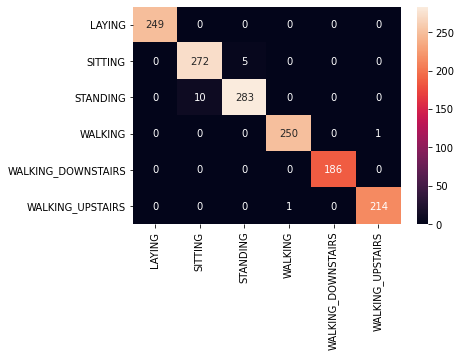

In [32]:
y_valid_label = list(encode.inverse_transform(y_valid))
cf_matrix = confusion_matrix(y_valid_label,Y_pred_label)
df = pd.DataFrame(cf_matrix,columns=encode.classes_)
df.index = encode.classes_
sns.heatmap(df, annot=True,fmt='d');

### Confusion Matrix and testing on test set

In [33]:
# Making the Confusion Matrix
Y_pred = final_model.predict(X_testt)
Y_pred_label = list(encode.inverse_transform(Y_pred))
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print("done up to here")
encode.fit(Y_test)
y_test = encode.transform(Y_test)

print(confusion_matrix(y_test,Y_pred))
print("\n")
print(classification_report(y_test,Y_pred))

print("Training set score for MLP: %f" % final_model.score(X_train , y_train))
print("Testing  set score for MLP: %f" % final_model.score(X_testt ,y_test ))

# svm_model.score

done up to here
[[521   0  16   0   0   0]
 [  1 439  50   0   0   1]
 [  0  20 512   0   0   0]
 [  0   0   0 469  20   7]
 [  0   0   0   1 402  17]
 [  0   0   0   5   2 464]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       537
           1       0.96      0.89      0.92       491
           2       0.89      0.96      0.92       532
           3       0.99      0.95      0.97       496
           4       0.95      0.96      0.95       420
           5       0.95      0.99      0.97       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

Training set score for MLP: 1.000000
Testing  set score for MLP: 0.952494


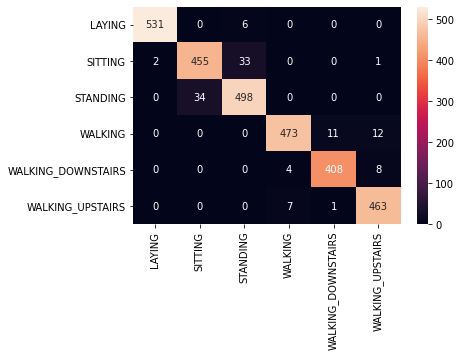

In [59]:
cf_matrix = confusion_matrix(Y_test,Y_pred_label)
df = pd.DataFrame(cf_matrix,columns=encode.classes_)
df.index = encode.classes_
sns.heatmap(df, annot=True,fmt='d');